**STEP 1: IMPORTING REQUIRED LIBRARIES**

In [31]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**STEP 2: LOADING AND CLEANING DATA SET**

In [32]:
#importing dataset
from google.colab import files
uploaded = files.upload()

Saving laptop_prices.csv to laptop_prices (1).csv


In [33]:
df=pd.read_csv('laptop_prices.csv')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [34]:
#Check for nulll value
print(df.isnull().sum())

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64


In [35]:
#describing the table
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [36]:
# removing duplicates
df.drop_duplicates(inplace=True)

In [37]:
#Converting categorical columns into numeric columns
# Ensure 'Weight' is treated as string before using .str accessor
df['Weight'] = df['Weight'].astype(str).str.replace('kg', '').astype(float)
# Convert 'Ram' to string before using .str accessor
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '').astype(int)

# Check if 'ScreenResolution' column exists before proceeding
if 'ScreenResolution' in df.columns:
    df['ScreenResolution'] = df['ScreenResolution'].apply(lambda x: x.split()[0])
    df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
    df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
    df['ScreenResolution'] = df['ScreenResolution'].apply(lambda x: x.split()[0])
else:
    print("Error: 'ScreenResolution' column not found in the DataFrame.")
    # You might want to inspect the column names here
    # print(df.columns)


if 'Cpu' in df.columns:
    df['Cpu'] = df['Cpu'].apply(lambda x: x.split()[0])
    df['CpuName'] = df['Cpu'].apply(lambda x: x.split()[0])
else:
    print("Error: 'Cpu' column not found in the DataFrame.")

if 'Gpu' in df.columns:
    df['Gpu'] = df['Gpu'].apply(lambda x: x.split()[0])
    df['GpuName'] = df['Gpu'].apply(lambda x: x.split()[0])
else:
    print("Error: 'Gpu' column not found in the DataFrame.")

Error: 'ScreenResolution' column not found in the DataFrame.
Error: 'Cpu' column not found in the DataFrame.
Error: 'Gpu' column not found in the DataFrame.


In [38]:
df.head()


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


**STEP 3: EXPLORATORY DATA ANALYSIS (EDA)**

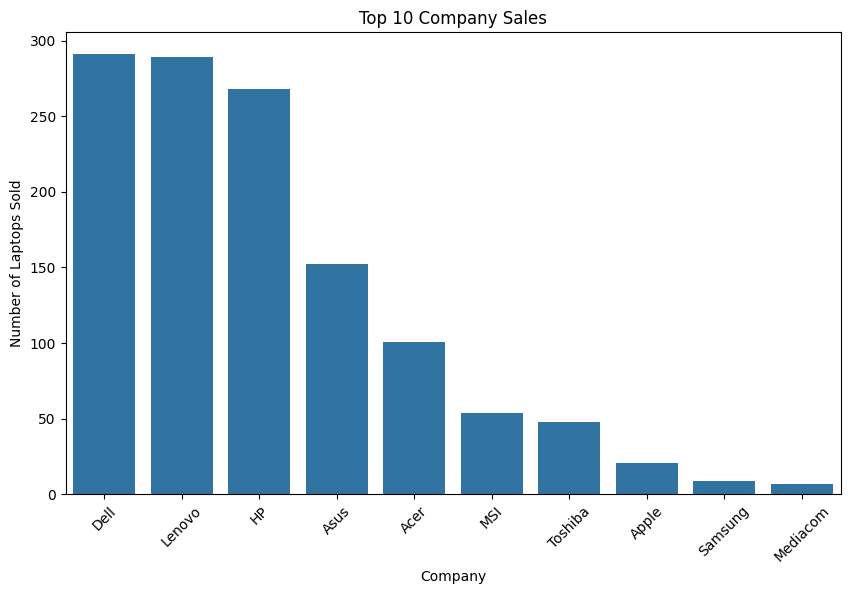

In [39]:
#top 10 company sales bar chart
top_companies = df['Company'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.title('Top 10 Company Sales')
plt.xlabel('Company')
plt.ylabel('Number of Laptops Sold')
plt.xticks(rotation=45)
plt.show()



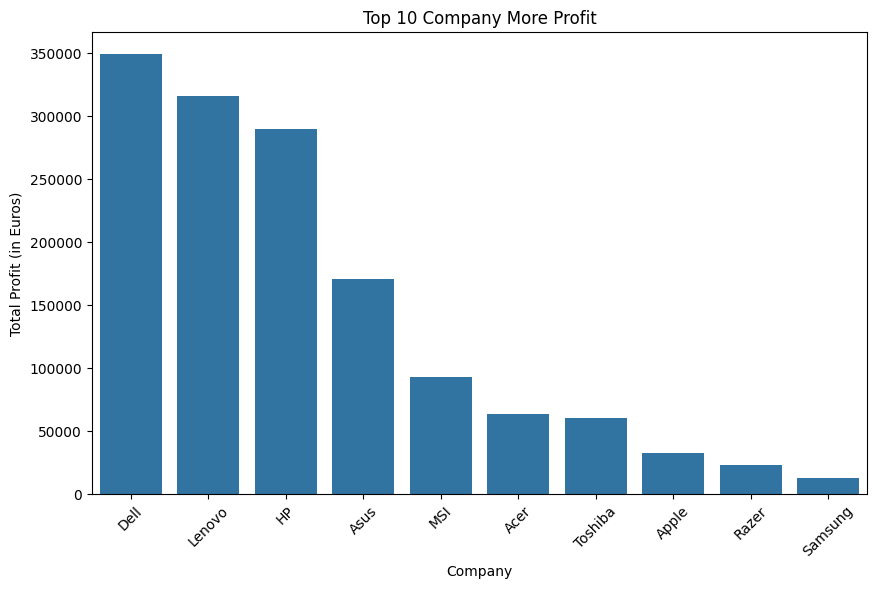

In [40]:
# top 10 company more profit
top_companies_profit = df.groupby('Company')['Price_euros'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies_profit.index, y=top_companies_profit.values)
plt.title('Top 10 Company More Profit')
plt.xlabel('Company')
plt.ylabel('Total Profit (in Euros)')
plt.xticks(rotation=45)
plt.show()

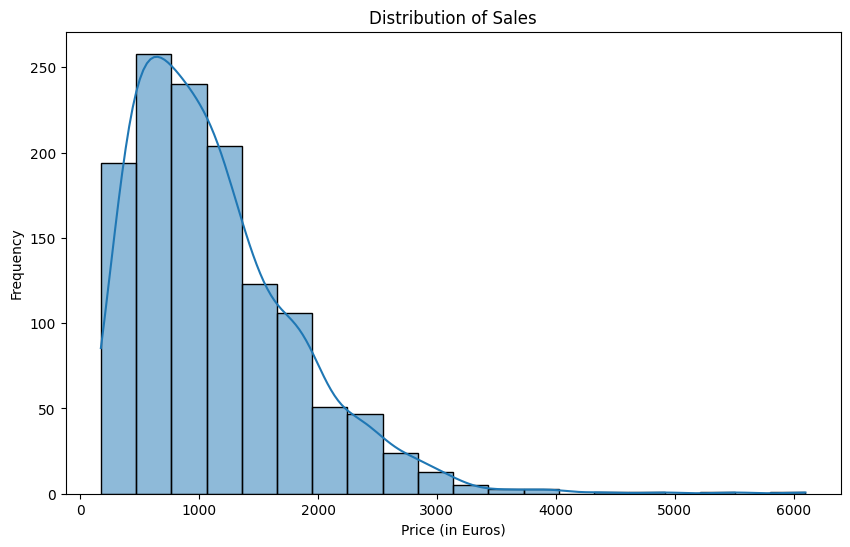

In [41]:
# DIstribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_euros'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Price (in Euros)')
plt.ylabel('Frequency')
plt.show()

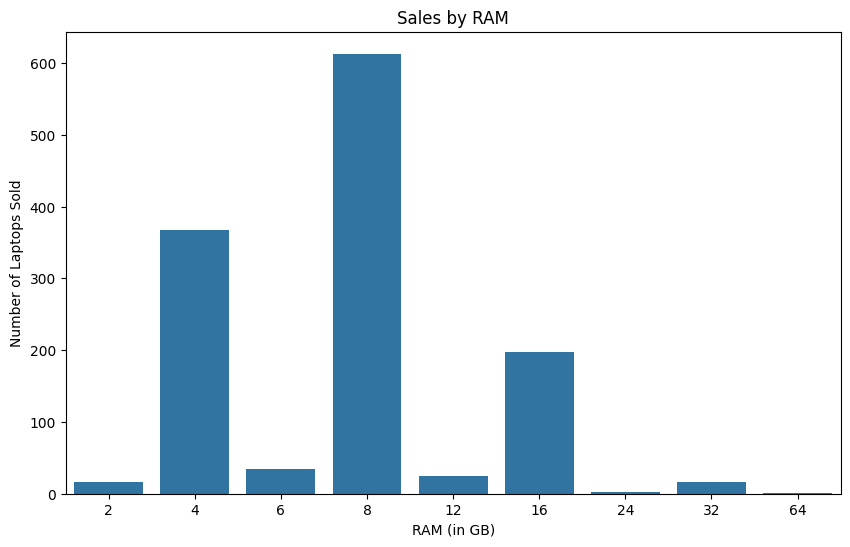

In [42]:
# sales by ram
plt.figure(figsize=(10, 6))
sns.countplot(x='Ram', data=df)
plt.title('Sales by RAM')
plt.xlabel('RAM (in GB)')
plt.ylabel('Number of Laptops Sold')
plt.show()

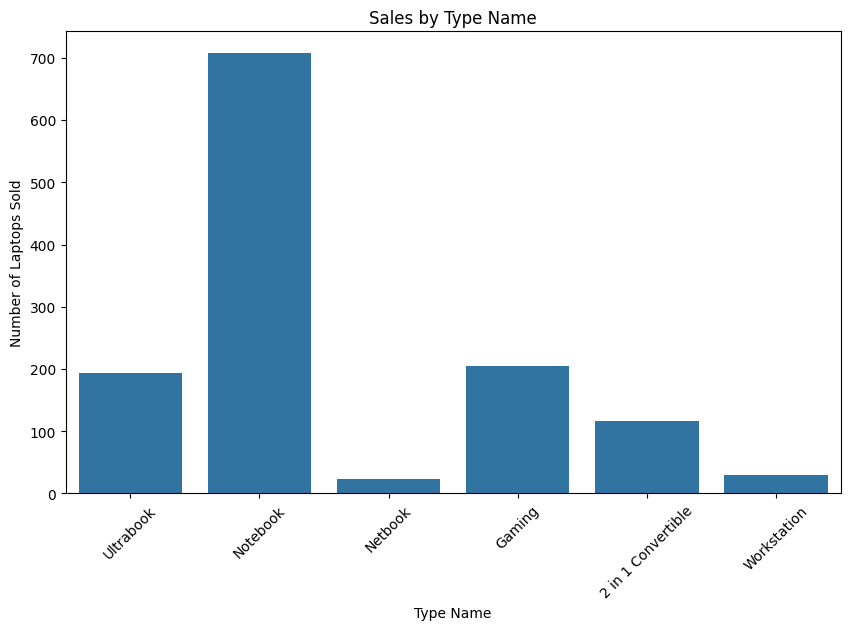

In [43]:
#sales by type name
plt.figure(figsize=(10, 6))
sns.countplot(x='TypeName', data=df)
plt.title('Sales by Type Name')
plt.xlabel('Type Name')
plt.ylabel('Number of Laptops Sold')
plt.xticks(rotation=45)
plt.show()

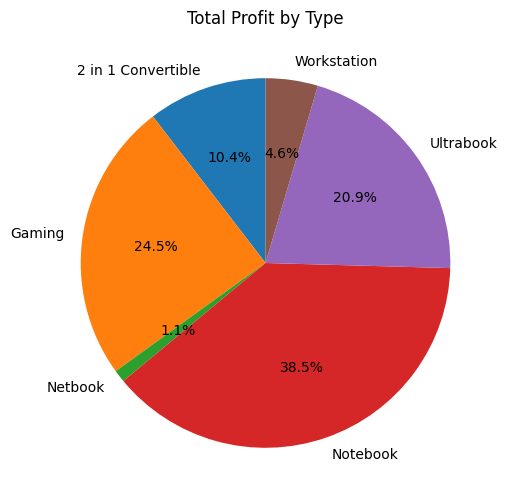

In [44]:
#total profit by type in pie chart
total_profit_by_type = df.groupby('TypeName')['Price_euros'].sum()
plt.figure(figsize=(10, 6))
plt.pie(total_profit_by_type, labels=total_profit_by_type.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Profit by Type')
plt.show()

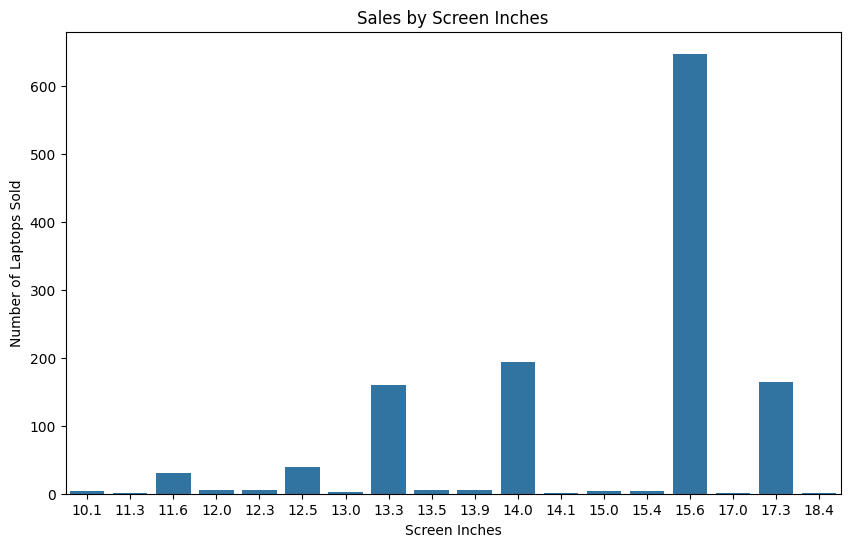

In [45]:
#sales by screen inches
plt.figure(figsize=(10, 6))
sns.countplot(x='Inches', data=df)
plt.title('Sales by Screen Inches')
plt.xlabel('Screen Inches')
plt.ylabel('Number of Laptops Sold')
plt.show()

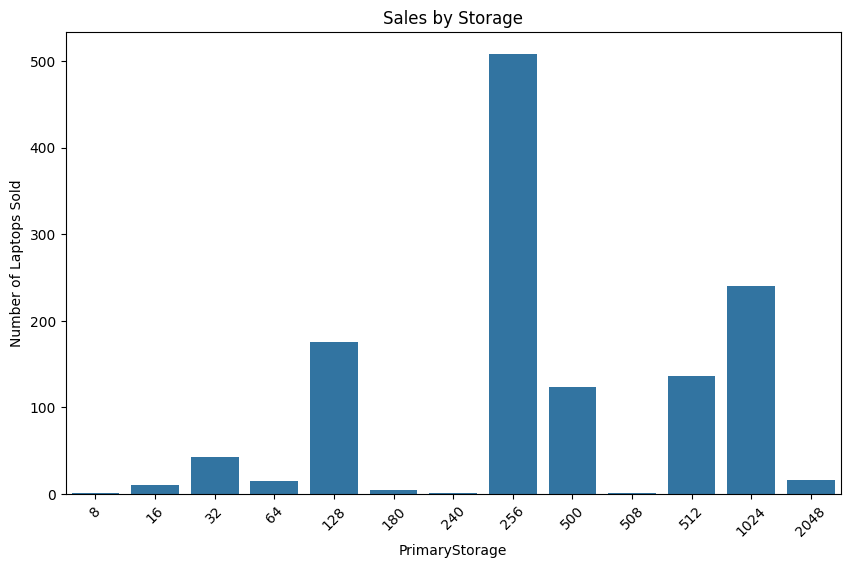

In [46]:
#Sales by storage
plt.figure(figsize=(10, 6))
sns.countplot(x='PrimaryStorage', data=df)
plt.title('Sales by Storage')
plt.xlabel('PrimaryStorage')
plt.ylabel('Number of Laptops Sold')
plt.xticks(rotation=45)
plt.show()


**STEP 4: PREDICTION**

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:

# Select features and target variable
features = df.drop(columns=['Price_euros', 'Product', 'CPU_model', 'GPU_model'])
target = df['Price_euros']

In [51]:
# One-Hot Encoding for categorical variables
categorical_cols = features.select_dtypes(include='object').columns
# Removed 'sparse=False' as it is deprecated/removed in newer versions
# Use sparse_output=False to get a dense array output directly from the encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = pd.DataFrame(encoder.fit_transform(features[categorical_cols]))

In [52]:
# Update feature names after encoding
encoded_categorical.columns = encoder.get_feature_names_out(categorical_cols)


In [53]:
# Combine with the rest of the features and drop original categorical columns
features = pd.concat([features.drop(columns=categorical_cols), encoded_categorical], axis=1)


In [54]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [55]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Predictions and Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [58]:
mae, mse, r2

(251.42576157968782, 116404.71720365695, 0.7654734913785267)

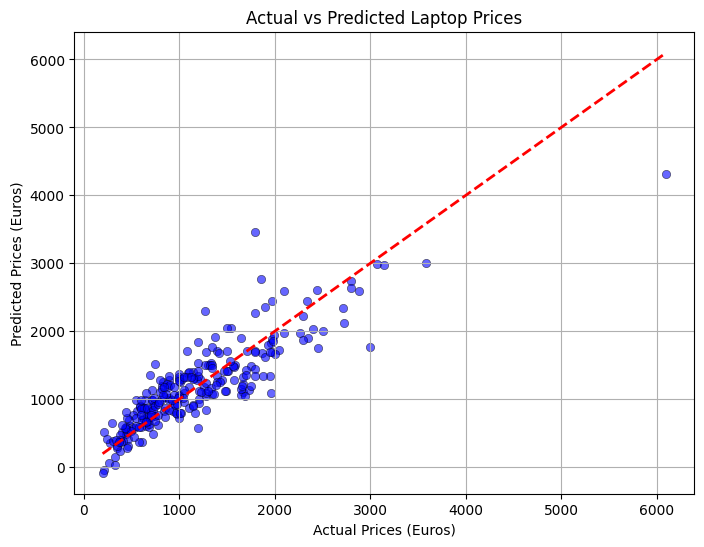

In [59]:
# Plotting the Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Laptop Prices')
plt.xlabel('Actual Prices (Euros)')
plt.ylabel('Predicted Prices (Euros)')
plt.grid(True)
plt.show()

**CONCLUSION:**


  The comprehensive analysis of laptop prices aimed to understand the critical factors influencing market pricing and to build a predictive model for accurate price estimation. Through data preprocessing, feature selection, and model training, a Linear Regression model was constructed to predict the target variable, Price_euros. The model achieved a satisfactory R² score of 76.5%, indicating that the selected features explained a significant portion of the price variations. Key factors contributing to laptop prices included brand (Company), screen size (Inches), RAM capacity, storage type (SSD, HDD, Flash), processor specifications (CPU frequency, CPU company), and display attributes. These findings suggest that consumers are willing to pay more for enhanced technical specifications and reputed brands.

  The visualization of Actual vs. Predicted Prices demonstrated a strong positive correlation, validating the model's effectiveness. However, some deviations from the ideal prediction line indicated possible unaccounted factors, such as market demand, special features, or build quality, which were not captured in the dataset. Furthermore, categorical features like Touchscreen capability, Retina Display, and IPS panel technology also played a role in influencing price, reflecting user preference for advanced display technologies.

  From a business perspective, this analysis provides critical insights for manufacturers and retailers. Brands like Apple, Dell, and HP consistently position themselves at higher price points due to premium build quality and brand recognition. Understanding these patterns can help companies optimize their pricing strategies and identify market gaps where competitively priced laptops with specific features could attract more consumers.

  Recommendations and Future Scope
 Expansion: Including additional features such as GPU specifications, battery life, and build material could further enhance model accuracy.

  Advanced Modeling Techniques: Applying models like Random Forest, Gradient Boosting, or XGBoost might capture nonlinear relationships more effectively.

  Market Trend Analysis: Studying historical price trends and market demand could provide deeper insights into pricing dynamics.

  Real-time Data Integration: Integrating real-time pricing data from online platforms could improve prediction reliability.

In conclusion, this analysis effectively highlighted the major determinants of laptop pricing, while also paving the way for future exploration in predictive modeling and market analytics.